In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # Uyarıyı kapatır
import warnings
# Tüm uyarıları görmezden gel
warnings.filterwarnings('ignore')

In [2]:
main_df = pd.read_csv("/content/drive/MyDrive/MyWorkSpace/Technical Analysis/Aselsan Stock Price History.csv")
main_df = main_df.iloc[::-1].reset_index(drop=True)
main_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/18/2025,129.9,128.8,130.6,126.9,25.49M,1.09%
1,04/21/2025,127.9,130.2,131.3,126.7,24.93M,-1.54%
2,04/22/2025,131.7,129.0,132.7,129.0,42.48M,2.97%
3,04/24/2025,134.5,132.3,134.8,131.6,41.71M,2.13%
4,04/25/2025,135.3,135.1,136.0,132.3,31.22M,0.59%


In [3]:
main_df.shape

(188, 7)

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      188 non-null    object 
 1   Price     188 non-null    float64
 2   Open      188 non-null    float64
 3   High      188 non-null    float64
 4   Low       188 non-null    float64
 5   Vol.      188 non-null    object 
 6   Change %  188 non-null    object 
dtypes: float64(4), object(3)
memory usage: 10.4+ KB


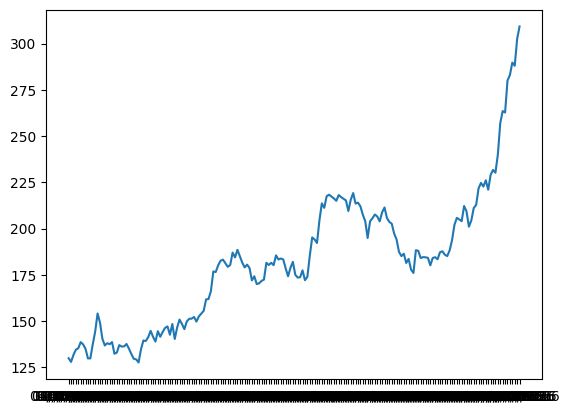

In [5]:
plt.plot(main_df["Date"],main_df["Price"])

# Veri Hazırlama

In [6]:
df = main_df[['Price','Date']]
print(df.head())
print(df.tail())

   Price        Date
0  129.9  04/18/2025
1  127.9  04/21/2025
2  131.7  04/22/2025
3  134.5  04/24/2025
4  135.3  04/25/2025
      Price        Date
183  283.00  01/12/2026
184  289.75  01/13/2026
185  288.00  01/14/2026
186  302.50  01/15/2026
187  309.25  01/16/2026


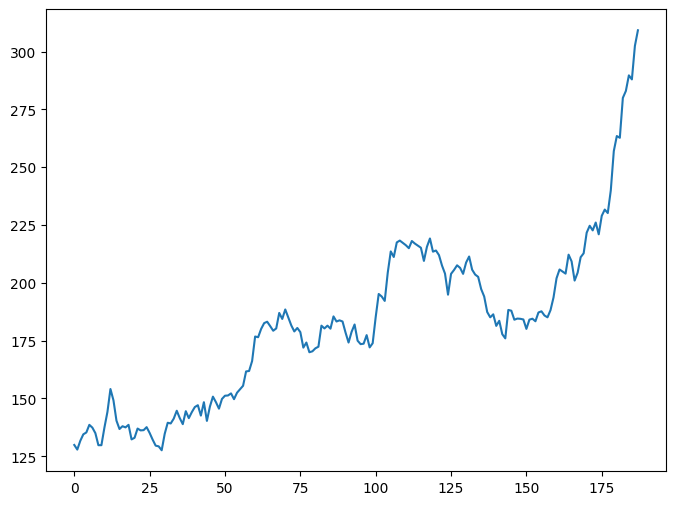

In [7]:
plt.figure(figsize=(8,6))
plt.plot(df.index,df["Price"])

In [8]:
Train = df.iloc[:120]
Test = df.iloc[120:]
print(Train.shape, Test.shape)

(120, 2) (68, 2)


In [9]:
Train.head(10)

,Price,Date
0,129.9,04/18/2025
1,127.9,04/21/2025
2,131.7,04/22/2025
3,134.5,04/24/2025
4,135.3,04/25/2025
5,138.6,04/28/2025
6,137.4,04/29/2025
7,135.0,04/30/2025
8,129.8,05/02/2025
9,129.8,05/05/2025


In [10]:
prediction_days = 6

Train_new = Train.drop(columns="Date").iloc[prediction_days:].copy()

for p in range(prediction_days):
  Train_new[f"d-{p+1}"] = None

for s in range(Train_new.shape[0]):
  for ni in range(prediction_days,0,-1):
      Train_new.iloc[s, Train_new.columns.get_loc(f"d-{ni}")] = Train["Price"].iloc[prediction_days - ni + s]

for col in Train_new.columns:
  Train_new[col] = Train_new[col].astype(float)

Train_new.head()

,Price,d-1,d-2,d-3,d-4,d-5,d-6
6,137.4,138.6,135.3,134.5,131.7,127.9,129.9
7,135.0,137.4,138.6,135.3,134.5,131.7,127.9
8,129.8,135.0,137.4,138.6,135.3,134.5,131.7
9,129.8,129.8,135.0,137.4,138.6,135.3,134.5
10,137.4,129.8,129.8,135.0,137.4,138.6,135.3


In [11]:
print(Train_new.head())
print(Train_new.tail())

    Price    d-1    d-2    d-3    d-4    d-5    d-6
6   137.4  138.6  135.3  134.5  131.7  127.9  129.9
7   135.0  137.4  138.6  135.3  134.5  131.7  127.9
8   129.8  135.0  137.4  138.6  135.3  134.5  131.7
9   129.8  129.8  135.0  137.4  138.6  135.3  134.5
10  137.4  129.8  129.8  135.0  137.4  138.6  135.3
     Price    d-1    d-2    d-3    d-4    d-5    d-6
115  215.2  216.1  217.0  218.1  215.0  216.3  217.3
116  209.5  215.2  216.1  217.0  218.1  215.0  216.3
117  215.6  209.5  215.2  216.1  217.0  218.1  215.0
118  219.2  215.6  209.5  215.2  216.1  217.0  218.1
119  213.5  219.2  215.6  209.5  215.2  216.1  217.0


(126.6, 310.25)

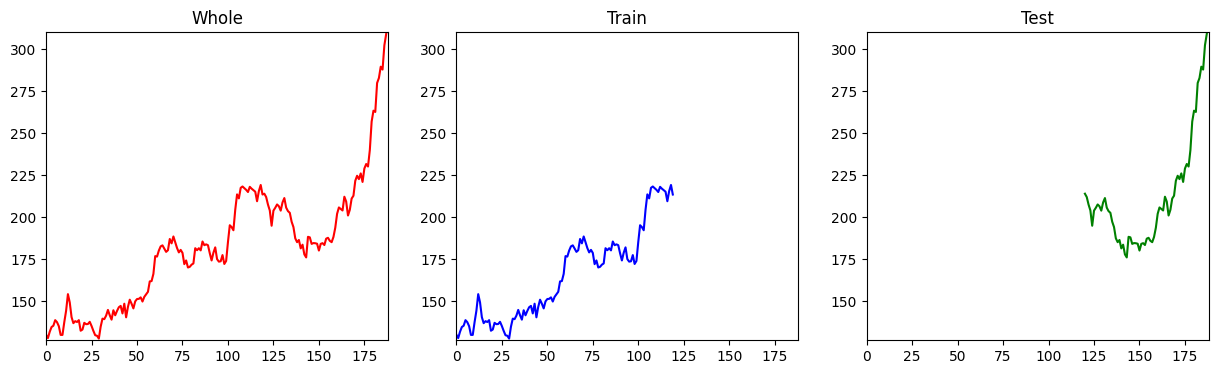

In [17]:
x = np.linspace(0, 10, 100)
max_val = df["Price"].max()
min_val = df["Price"].min()
max_ind = df.shape[0]
# nrows=1 olduğu için sadece tek indeks yeterli: axes[0], axes[1]...
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].plot(df["Price"], 'r')
axes[0].set_title('Whole')
axes[0].set_xlim(0,max_ind)
axes[0].set_ylim(min_val-1,max_val+1)

axes[1].plot(Train["Price"], 'b')
axes[1].set_title('Train')
axes[1].set_xlim(0,max_ind)
axes[1].set_ylim(min_val-1,max_val+1)

axes[2].plot(Test["Price"], 'g')
axes[2].set_title('Test')
axes[2].set_xlim(0,max_ind)
axes[2].set_ylim(min_val-1,max_val+1)

# Model Eğitimi

In [18]:
X_train = Train_new.drop(columns="Price")
y_train = Train_new["Price"]
print(X_train.shape, y_train.shape)

(114, 6) (114,)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [20]:
model = Sequential([
    # 1. LSTM Katmanı
    LSTM(units=50, activation='tanh', input_shape=(X_train.shape[1], 1)),

    # 2. Dropout (Ezberlemeyi Önleme)
    Dropout(0.2),

    # 3. Çıkış Katmanı
    Dense(units=1)
])

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 28045.8262
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28305.8164 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28072.7129 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27823.7207 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27424.3691 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28014.3438 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27299.9375 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27848.1816 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27128.5527 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27463.5430 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26873.9980 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26275.6738 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26401.7402 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25426.3359 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

In [22]:
Test

,Price,Date
120,214.00,10/13/2025
121,212.00,10/14/2025
122,207.50,10/15/2025
123,204.00,10/16/2025
124,194.90,10/17/2025
...,...,...
183,283.00,01/12/2026
184,289.75,01/13/2026
185,288.00,01/14/2026
186,302.50,01/15/2026


In [23]:
preds=[]
prev = Train_new.iloc[-1].drop("Price")
prev = prev.shift(1)
prev.iloc[0] = Train_new.iloc[-1]["Price"]
for i in range(15):
    pred = model.predict(prev.values.reshape(1, -1))
    preds.append(pred[0])
    prev = prev.shift(1)
    prev.iloc[0] = pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


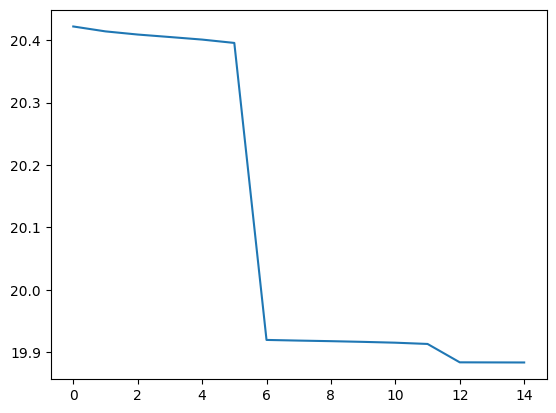

In [24]:
plt.plot(preds)